## Libraries

In [1]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
import pickle
from scipy import signal

In [2]:
import cufflinks as cf
cf.go_offline()

In [3]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
%run ..\..\Data\triangulars.ipynb
%run ..\Function.ipynb

## Functions

### Gplearn functions

In [5]:
# custom metric
def _mape(y, y_pred, w):
    diffs = np.abs(np.divide((np.maximum(0.001, y) - np.maximum(0.001, y_pred)),np.maximum(0.001, y)))
    
    return 100. * np.average(diffs, weights=w)

mape = make_fitness(_mape, greater_is_better=False)

In [6]:
cos_7 = make_function(function=CustomSC.cos_7, name='cos_7', arity=1)

sin_7 = make_function(function=CustomSC.sin_7, name='sin_7', arity=1)

cos_365 = make_function(function=CustomSC.cos_365, name='cos_365', arity=1)

sin_365 = make_function(function=CustomSC.sin_365, name='sin_365', arity=1)

abscos_14 = make_function(function=CustomSC.abscos_14, name='abscos_14', arity=1)

abssin_14 = make_function(function=CustomSC.abssin_14, name='abssin_14', arity=1)

In [7]:
def one(x1): return np.ones(len(x1))

one = make_function(function = one, name = 'one', arity = 1)

In [8]:
def time(x1): return np.arange(1, len(x1)+1)

time = make_function(function = time,name = 'time', arity = 1)

## FOURIER

## Load data

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
%run ..\..\Data\triangulars.ipynb

In [11]:
path_consumo = Path().resolve().parents[1] / "Data" / "Data1.xlsx"
consumo = pd.read_excel(path_consumo)
consumo = consumo.set_index("fecha").loc["2007-01-01":"2020-03-30"]

In [12]:
festivos=pd.read_excel(Path().resolve().parents[1] / "Data" /"Festivos.xlsx")
festivos2=pd.read_excel(Path().resolve().parents[1] / "Data" / "Festivos2.xlsx")
fest = triangulars().festivos(X = consumo, festivos = festivos, festivos2 = festivos2)

In [13]:
t = np.arange(1, consumo.size+1).reshape(-1, 1)
day = consumo.index.dayofyear
weekd = consumo.index.weekday
weekd1 = pd.get_dummies(weekd, prefix = "wday", drop_first = True)
weekd1.index = consumo.index

X1 = triangulars().diffseason(consumo)
X1 = pd.concat([X1, fest, weekd1], axis = 1)
X1["t"] = t
X1["day"] = day/day.max()

## LR with clima var

In [14]:
# scale data
X_train, X_test, y_train, y_test = train_test_split(X1, consumo, test_size = 365, shuffle = False)
scaler1 = MaxAbsScaler(); scaler1.fit(y_train)
y_train = scaler1.transform(y_train).reshape(-1) 
y_test = scaler1.transform(y_test).reshape(-1)
# fit linear regression
run = LinearRegression().fit(X_train, y_train)
y_res_tr = run.predict(X_train)
y_res_te = run.predict(X_test)
# join forecasting and train prediction
y_res = np.hstack([y_res_tr, y_res_te])

In [15]:
y_pred = scaler1.inverse_transform(y_res.reshape(-1, 1))

In [16]:
plott = pd.DataFrame(y_pred, index = consumo.index, columns = ["predict"])
plott["real"] = consumo.to_numpy().reshape(-1)

In [17]:
# plott.iplot()

In [18]:
y_residual = plott.real - plott.predict

In [19]:
# y_residual.iplot()

## Fourier a residual

### Funciones

In [20]:
# custom metric
def _mape(y, y_pred, w):
    diffs = np.abs(np.divide((np.maximum(0.001, y) - np.maximum(0.001, y_pred)),np.maximum(0.001, y)))
    
    return 100. * np.average(diffs, weights=w)

mape = make_fitness(_mape, greater_is_better=False)

In [21]:
cos_7 = make_function(function=CustomSC.cos_7, name='cos_7', arity=1)

sin_7 = make_function(function=CustomSC.sin_7, name='sin_7', arity=1)

cos_365 = make_function(function=CustomSC.cos_365, name='cos_365', arity=1)

sin_365 = make_function(function=CustomSC.sin_365, name='sin_365', arity=1)

abscos_14 = make_function(function=CustomSC.abscos_14, name='abscos_14', arity=1)

abssin_14 = make_function(function=CustomSC.abssin_14, name='abssin_14', arity=1)

In [22]:
def cos_91(x1): return np.cos(2*np.pi*x1/91.283019)

cos_91 = make_function(function=cos_91, name='cos_91', arity=1)

def sin_91(x1): return np.sin(2*np.pi*x1/91.283019)

sin_91 = make_function(function=sin_91, name='sin_91', arity=1)

In [23]:
def cos_73(x1): return np.cos(2*np.pi*x1/73.303030)

cos_73 = make_function(function=cos_73, name='cos_73', arity=1)

def sin_73(x1): return np.sin(2*np.pi*x1/73.303030)

sin_73 = make_function(function=sin_73, name='sin_73', arity=1)

In [24]:
def cos_345(x1): return np.cos(2*np.pi*x1/345.571429)

cos_345 = make_function(function=cos_345, name='cos_345', arity=1)

def sin_345(x1): return np.sin(2*np.pi*x1/345.571429)

sin_345 = make_function(function=sin_345, name='sin_345', arity=1)

In [25]:
def cos_1612(x1): return np.cos(2*np.pi*x1/1612.666667)

cos_1612 = make_function(function=cos_1612, name='cos_1612', arity=1)

def sin_1612(x1): return np.sin(2*np.pi*x1/1612.666667)

sin_1612 = make_function(function=sin_1612, name='sin_1612', arity=1)

In [26]:
def cos_120(x1): return np.cos(2*np.pi*x1/120.95)

cos_120 = make_function(function=cos_120, name='cos_120', arity=1)

def sin_120(x1): return np.sin(2*np.pi*x1/120.95)

sin_120 = make_function(function=sin_120, name='sin_120', arity=1)

In [27]:
def cos_967(x1): return np.cos(2*np.pi*x1/967.6)

cos_967 = make_function(function=cos_967, name='cos_967', arity=1)

def sin_967(x1): return np.sin(2*np.pi*x1/967.6)

sin_967 = make_function(function=sin_967, name='sin_967', arity=1)

In [28]:
def one(x1):
    return np.ones(len(x1))

one = make_function(function = one, 
                    name = 'one', 
                    arity = 1)

In [29]:
def time(x1):
    return np.arange(1, len(x1)+1)

time = make_function(function = time,
                    name = 'time',
                    arity = 1)

### Fourier

In [30]:
f, asd = signal.periodogram(y_residual, 1)
# plt.figure()
# plt.plot(1/f, asd)
picos = pd.DataFrame(asd, 1/(f), columns=["potencia"])
picos = picos.sort_values(by="potencia",ascending=False).reset_index().head(12).tail(12)
picos.columns = ["periodo", "potencia"]

#fourier
sencos = pd.DataFrame(index = y_residual.index)
t = np.arange(1,len(y_residual)+1)
sencos["t"]=t
for i  in  picos.periodo:
        sencos[f"{i:.2f}_sen"] = np.abs(np.sin(((2*np.pi)/(i))*t))
        sencos[f"{i:.2f}_cos"] = np.abs(np.cos(((2*np.pi)/(i))*t))
sencos['ones']=1
sencos['sen1']=np.abs(np.sin(((2*np.pi)/(365.25))*t))
sencos['cos1']=np.abs(np.cos(((2*np.pi)/(365.25))*t))
sencos = sencos/sencos.max()

C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide



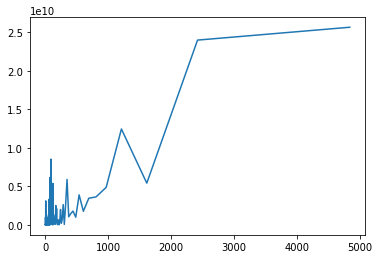

In [31]:
plt.figure()
plt.plot(1/f, asd)

In [32]:
picos

,periodo,potencia
0,4838.000000,2.564089e+10
1,2419.000000,2.397335e+10
2,1209.500000,1.244281e+10
3,91.283019,8.533943e+09
4,73.303030,6.138829e+09
5,345.571429,5.899579e+09
6,1612.666667,5.420379e+09
7,120.950000,5.382382e+09
8,967.600000,4.876692e+09
9,537.555556,3.897001e+09


In [33]:
int(987.2)

987

In [34]:
for i in [967.6]:
    print(f"""
def cos_{int(i)}(x1): return np.cos(2*np.pi*x1/{i})
    
cos_{int(i)} = make_function(function=cos_{int(i)}, name='cos_{int(i)}', arity=1)
    
def sin_{int(i)}(x1): return np.sin(2*np.pi*x1/{i})
    
sin_{int(i)} = make_function(function=sin_{int(i)}, name='sin_{int(i)}', arity=1)
    """)


def cos_967(x1): return np.cos(2*np.pi*x1/967.6)
    
cos_967 = make_function(function=cos_967, name='cos_967', arity=1)
    
def sin_967(x1): return np.sin(2*np.pi*x1/967.6)
    
sin_967 = make_function(function=sin_967, name='sin_967', arity=1)
    


## Regresion simbolica

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_residual, test_size  = 365, shuffle = False)

# scaler = MaxAbsScaler(); scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

scaler2 = MaxAbsScaler(); scaler2.fit(y_train1.to_numpy().reshape(-1, 1))
y_train = scaler2.transform(y_train1.to_numpy().reshape(-1, 1)).reshape(-1)
y_test = scaler2.transform(y_test1.to_numpy().reshape(-1, 1)).reshape(-1)

In [77]:
# Tratar:
## Coeficiente de parsimony más pequeño
## Incluir primer/os pico/s
## incluir picos siguientes
## p_crossover 0.5
## p_crossover 0.8
## persemony alto, poblacion alta y mas generaciones --
36

36

In [78]:
model = SymbolicRegressor(population_size=5000, init_method = "half and half",
                           p_crossover=0.55, p_subtree_mutation = 0.25, p_hoist_mutation = 0.1, p_point_mutation = 0.1,
                           warm_start = False,
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs', 'log', 'sqrt',
                                         cos_91,sin_91, cos_73, sin_73, cos_345, sin_345, cos_1612, sin_1612, 
                                         sin_7, cos_7, abssin_14, abscos_14, cos_967, sin_967, cos_120, sin_120), 
#                           feature_names = [*X.columns],
#                            metric = mape,
                           max_samples = 0.95,
                           generations=50, stopping_criteria=0.01, parsimony_coefficient=0.000001,
                           verbose=1, random_state=0)

In [79]:
# Lower persemony
# notice Fitness change after many iterations and related it to GD and QP

In [80]:
# 23 min, 19 iteration to 18

In [81]:
model.fit(X_train, y_train) # scaled data

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     6.32          1.09983        5         0.197278         0.230394      9.05m
   1     6.10         0.364281        3         0.197209         0.228471      7.91m
   2     6.67         0.302539        9         0.194587         0.207103      7.78m
   3     7.11         0.310168       10         0.194944         0.198559      7.61m
   4     7.44         0.313306       12         0.194216         0.207914      7.62m
   5     9.02         0.484751       13         0.193804         0.224957      7.80m
   6    11.05         0.420321       12         0.193401         0.228219      8.63m
   7    12.59         0.417485       25         0.192739         0.218827      9.00m
   8    14.41         0.382921       14         0.192165          0.22974  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs',
                                'log', 'sqrt',
                                <gplearn.functions._Function object at 0x00000213A616228...
                  generations=50, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.95, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.55, p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.25,
                  parsimony_coefficient=1e-06, population_size=5000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [89]:
y_predict_tr = model.predict(X_train)
y_predict_te = model.predict(X_test)

In [90]:
y_prediction = np.hstack([y_predict_tr, y_predict_te])

In [91]:
y_prediction = scaler2.inverse_transform(y_prediction.reshape(-1, 1))

In [92]:
graph = pd.DataFrame(y_prediction, index = consumo.index, columns = ["predict_res"])
graph["residual"] = y_residual

In [93]:
# [["residual", "predict_res"]]

In [94]:
graph[["residual", "predict_res"]].iplot()

In [88]:
print(model._program)

sin_91(sub(sub(cos_73(div(X2, -0.015)), abs(sub(sub(cos_73(div(X2, -0.015)), abs(sub(sub(cos_73(div(X2, -0.015)), abs(abssin_14(sub(div(cos_967(X3), cos_7(sub(cos_73(abssin_14(abs(div(X2, -0.015)))), X5))), sqrt(div(abssin_14(X1), sin_91(sub(sin_91(cos_345(div(add(X4, cos_73(div(sub(sub(mul(X2, sin(0.820)), cos_73(abssin_14(sub(sub(cos_73(div(X2, -0.015)), abs(sub(cos_73(div(sub(sub(sin_7(add(X2, X4)), sin_120(sub(sub(X1, 0.068), log(X3)))), log(X3)), -0.015)), sin_73(cos_120(X0))))), sin_120(cos_73(sin_73(X0))))))), sin_73(sub(sub(cos_73(div(X2, -0.015)), abs(sub(sub(cos_73(div(X2, -0.015)), abs(sub(sub(cos_73(sin_345(X4)), abs(sub(cos_73(div(sub(sub(mul(X2, sin(0.820)), cos_73(abssin_14(sub(sub(cos_73(div(X2, -0.015)), abs(sub(abssin_14(X1), div(X2, -0.015)))), sin_120(cos_73(sub(X3, log(X3)))))))), log(X3)), -0.015)), sin_73(cos_7(sub(X2, X5)))))), log(log(X3))))), log(X3)))), log(cos_73(div(sub(sub(abs(sin(abscos_14(X1))), cos_73(abssin_14(sub(sub(cos_73(div(X2, -0.015)), abs(sub(c

In [ ]:
with open("fourier2_t", "wb") as f:
    pickle.dump(model, f)